In [2]:
import pandas as pd

data = pd.read_csv('/Users/mac/Documents/AI_DIABETE/diabetes.csv')

print(data.head())

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


In [4]:
import pandas as pd

# Remplace les 0 par NaN dans les colonnes spécifiées
cols = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
data[cols] = data[cols].replace(0, pd.NA)

# Remplace les NaN par la médiane de chaque colonne et ajuste les types de données
for col in cols:
    data[col] = data[col].fillna(data[col].median()).infer_objects()

# Vérifie les types de données et ajuste si nécessaire
print(data.dtypes)


Pregnancies                   int64
Glucose                     float64
BloodPressure               float64
SkinThickness               float64
Insulin                     float64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object


       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  121.656250      72.386719      29.108073  140.671875   
std       3.369578   30.438286      12.096642       8.791221   86.383060   
min       0.000000   44.000000      24.000000       7.000000   14.000000   
25%       1.000000   99.750000      64.000000      25.000000  121.500000   
50%       3.000000  117.000000      72.000000      29.000000  125.000000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    32.455208                  0.471876   33.240885    0.348958  
std      6.875177                  0.331329   11.760232    0.476951  
min     18.200000                  

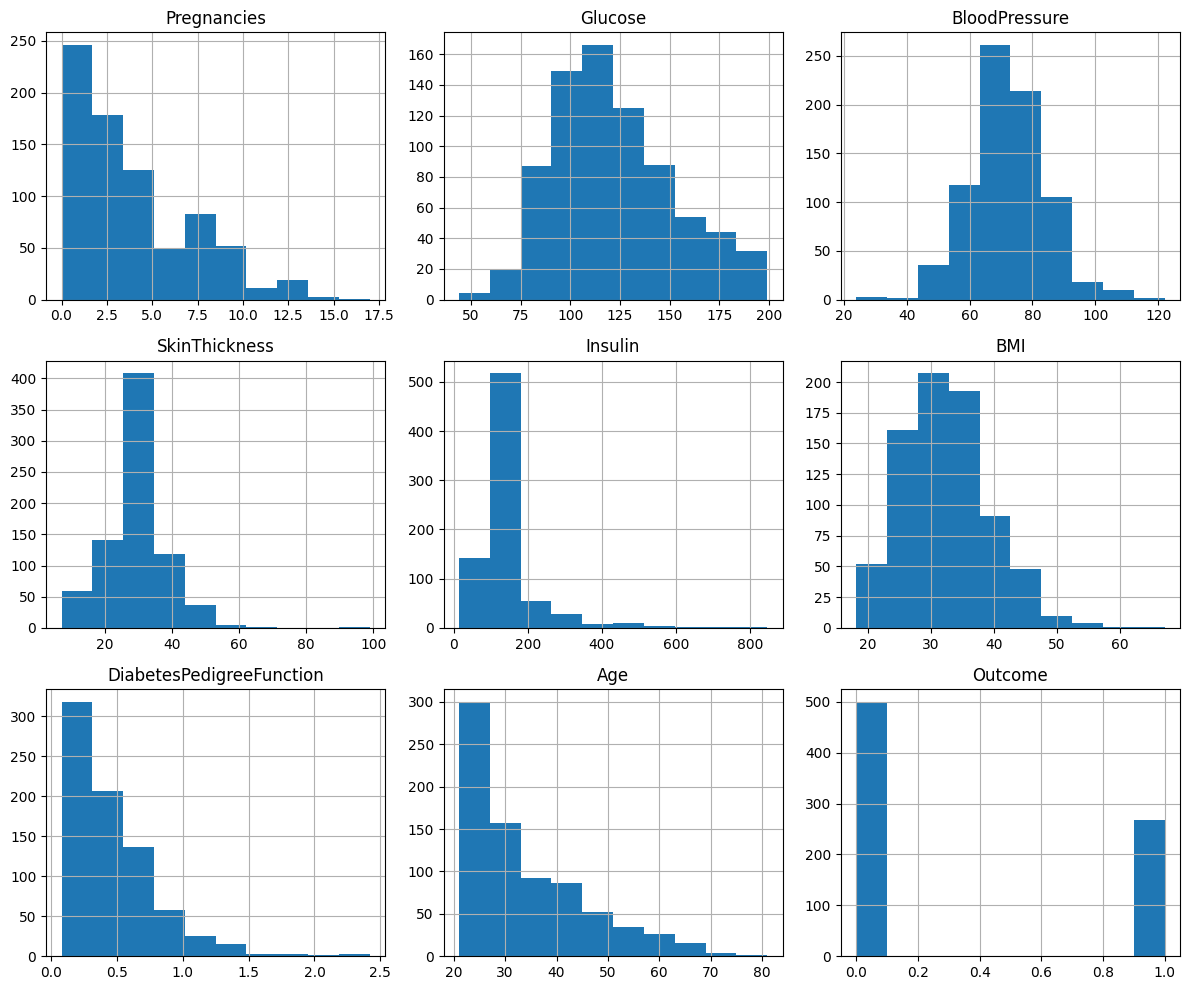

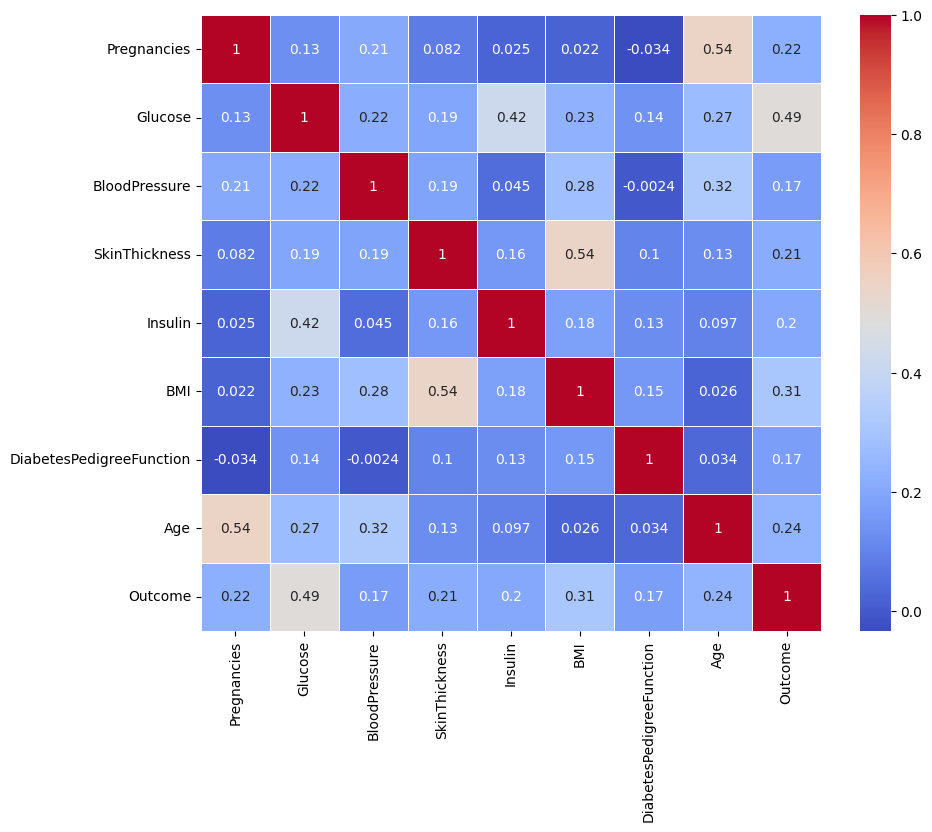

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Statistiques descriptives
print(data.describe())

# Histogrammes pour toutes les variables numériques
data.hist(figsize=(12, 10))
plt.tight_layout()  # Ajuste automatiquement les sous-graphiques pour qu'ils s'insèrent dans la figure principale
plt.show()

# Matrice de corrélation pour voir les relations potentielles
correlation_matrix = data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.show()


In [12]:
from sklearn.preprocessing import StandardScaler

# Création d'un objet scaler
scaler = StandardScaler()

# Fit sur les données d'entraînement uniquement
X_train_scaled = scaler.fit_transform(X_train)

# Transformer les données de test
X_test_scaled = scaler.transform(X_test)

# Créer et entraîner le modèle sur les données normalisées
model = LogisticRegression(max_iter=1000)
model.fit(X_train_scaled, y_train)

# Évaluation du modèle
predictions = model.predict(X_test_scaled)
print(classification_report(y_test, predictions))
print(confusion_matrix(y_test, predictions))


              precision    recall  f1-score   support

           0       0.79      0.82      0.81       151
           1       0.64      0.59      0.61        80

    accuracy                           0.74       231
   macro avg       0.71      0.70      0.71       231
weighted avg       0.74      0.74      0.74       231

[[124  27]
 [ 33  47]]
